**Mount Google Drive into your Colab.**

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi


Mon Jan  2 10:37:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 6.0 MB 60.7 MB/s 
     |████████████████████████████████| 439 kB 74.2 MB/s 
     |████████████████████████████████| 1.7 MB 67.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/AI /Models/model 2/Data/train'
valid_path = '/content/drive/MyDrive/AI /Models/model 2/Data/test'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [8]:
for layer in inception.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/AI /Models/model 2/Data/train/*')

In [10]:
folders


['/content/drive/MyDrive/AI /Models/model 2/Data/train/tomatoes',
 '/content/drive/MyDrive/AI /Models/model 2/Data/train/apples']

In [11]:
x = Flatten()(inception.output)


In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input , outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
model.compile(
    loss='categorical_crossentropy' ,
    optimizer='adam' ,
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,
                                   shear_range = 0.2 ,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI /Models/model 2/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 294 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI /Models/model 2/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 97 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
19/19 [==============================] - 81s 4s/step - loss: 4.3643 - accuracy: 0.6769 - val_loss: 2.0046 - val_accuracy: 0.8041
Epoch 2/10
19/19 [==============================] - 4s 222ms/step - loss: 1.5250 - accuracy: 0.9048 - val_loss: 1.3382 - val_accuracy: 0.8557
Epoch 3/10
19/19 [==============================] - 4s 235ms/step - loss: 0.4039 - accuracy: 0.9524 - val_loss: 0.7910 - val_accuracy: 0.8866
Epoch 4/10
19/19 [==============================] - 4s 221ms/step - loss: 0.0865 - accuracy: 0.9762 - val_loss: 0.6813 - val_accuracy: 0.8660
Epoch 5/10
19/19 [==============================] - 4s 220ms/step - loss: 0.0538 - accuracy: 0.9966 - val_loss: 0.6761 - val_accuracy: 0.8866
Epoch 6/10
19/19 [==============================] - 4s 235ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.5348 - val_accuracy: 0.8660
Epoch 7/10
19/19 [==============================] - 5s 276ms/step - loss: 0.0176 - accuracy: 0.9966 - val_loss: 0.7369 - val_accuracy: 0.8247
Epoch 8/

In [19]:
import matplotlib.pyplot as plt

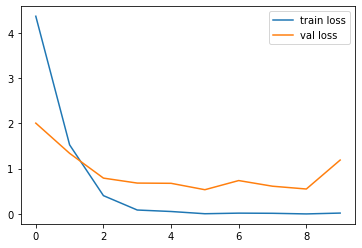

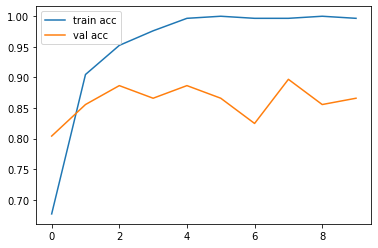

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [21]:
from tensorflow.keras.models import load_model

model.save('model2_apple_and_tomato.h5')

In [22]:
y_pred = model.predict(test_set)

7/7 [==============================] - 2s 57ms/step


In [23]:
y_pred


array([[1.00000000e+00, 2.11200804e-14],
       [1.53647113e-06, 9.99998450e-01],
       [9.99997497e-01, 2.46985337e-06],
       [9.67899621e-01, 3.21003199e-02],
       [4.68563299e-10, 1.00000000e+00],
       [1.14648291e-09, 1.00000000e+00],
       [4.24150690e-17, 1.00000000e+00],
       [1.00000000e+00, 3.21646876e-10],
       [9.99863744e-01, 1.36254428e-04],
       [9.46320267e-09, 1.00000000e+00],
       [3.91529016e-02, 9.60847080e-01],
       [1.00552402e-02, 9.89944816e-01],
       [1.00000000e+00, 3.74426835e-12],
       [5.49162030e-01, 4.50837940e-01],
       [9.84185874e-01, 1.58140715e-02],
       [1.00000000e+00, 4.33680273e-13],
       [9.99965668e-01, 3.43290012e-05],
       [1.64104762e-07, 9.99999881e-01],
       [1.67794156e-09, 1.00000000e+00],
       [9.86620665e-01, 1.33793224e-02],
       [9.98619556e-01, 1.38040527e-03],
       [1.42487419e-16, 1.00000000e+00],
       [5.77812195e-01, 4.22187835e-01],
       [4.07376022e-10, 1.00000000e+00],
       [1.000000

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1])

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
!cp '/content/model2_apple_and_tomato.h5' -d '/content/drive/MyDrive/AI /Models/model 2/'

In [28]:
model=load_model('model2_apple_and_tomato.h5')

In [29]:
img=image.load_img('/content/drive/MyDrive/AI /Training Materials/apple.jpg',target_size=(224,224))

In [30]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [31]:
x.shape

(224, 224, 3)

In [32]:

x=x/255

In [33]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.13421497, 0.86578506]], dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 25ms/step


In [36]:
a==1

array([ True])